In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df,how='outer', on='city')

# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
grouped_df = combined_df.groupby("city")
avg_fare = grouped_df.mean()["fare"]
total_rides = grouped_df.count()["ride_id"]
total_drivers = grouped_df.mean()["driver_count"]
city_type = city_df.set_index('city')['type']
city_data = pd.DataFrame({
    "Average Fare": avg_fare,
    "Total Number of Rides": total_rides,
    "Total Number of Drivers": total_drivers,
    "Type of City": city_type})
city_data.head()


,Average Fare,Total Number of Rides,Total Number of Drivers,Type of City
Amandaburgh,24.641667,18,12.0,Urban
Barajasview,25.332273,22,26.0,Urban
Barronchester,36.422500,16,11.0,Suburban
Bethanyland,32.956111,18,22.0,Suburban
Bradshawfurt,40.064000,10,7.0,Rural


## Bubble Plot of Ride Sharing Data

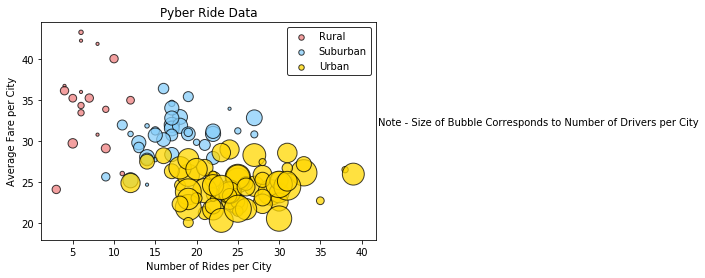

In [3]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

#city categories
rural = city_data[city_data['Type of City'] == 'Rural']
suburban = city_data[city_data['Type of City'] == 'Suburban']
urban = city_data[city_data['Type of City'] == 'Urban']

plt.scatter(rural['Total Number of Rides'], rural['Average Fare'], s = rural['Total Number of Drivers']*10, color = "LightCoral", edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Total Number of Rides'], suburban['Average Fare'], s = suburban['Total Number of Drivers']*10, color = "LightSkyBlue", edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Total Number of Rides'], urban['Average Fare'], s = urban['Total Number of Drivers']*10, color = "Gold", edgecolor = 'black', label = 'Urban', alpha = .75)

            
plt.title('Pyber Ride Data')
plt.text(42,32,'Note - Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

legend = plt.legend(frameon = True, edgecolor = 'black')
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

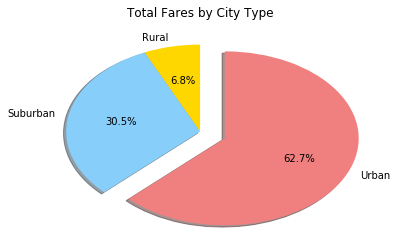

In [12]:
# Calculate Type Percents
city_type = combined_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
fare =  city_type.sum()['fare']
labels = fare.index
colors = ["Gold", "LightSkyBlue","LightCoral"]
explode = (0,0,0.2)

# Build Pie Chart
plt.pie(fare, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", startangle = 90, shadow = True)
plt.title("Total Fares by City Type")
plt.show()

In [6]:
# Save Figure
plt.savefig("../Images/PyPies.png")

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

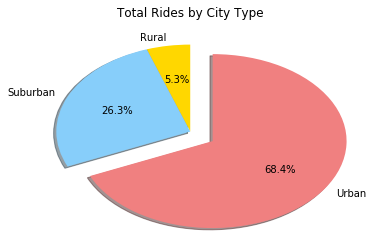

In [13]:
# Calculate Ride Percents
city_type = combined_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
rides = city_type.count()['ride_id']
labels = rides.index
colors = ["Gold", "LightSkyBlue","LightCoral"]
explode = (0,0,0.2)
# Build Pie Chart
plt.pie(rides, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", startangle = 90, shadow = True)
plt.title("Total Rides by City Type")
# Save Figure
plt.savefig("../Images/PyPies1.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

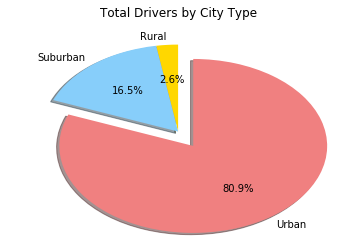

In [14]:
# Calculate Driver Percents
drivers = city_df.groupby('type')['driver_count'].sum()

labels = drivers.index
colors = ["Gold", "LightSkyBlue","LightCoral"]
explode = (0,0,0.2)

# Build Pie Charts
plt.pie(drivers, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", startangle = 90, shadow = True)
plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/PyPies2.png")

In [10]:
# Show Figure
plt.show()